In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times"

In [2]:
df = pd.read_csv("../data/data.csv", skiprows=1)

In [3]:
df

,group,z,theta,z_dot,theta_dot,u
0,0,0.142761,-0.103123,-1.000000,0.776698,1.752666
1,0,0.108862,-0.076795,-0.940940,0.678640,2.537212
2,0,0.076966,-0.053790,-0.855195,0.438721,3.216315
3,0,0.047976,-0.038918,-0.746350,0.075486,3.761179
4,0,0.022676,-0.036359,-0.618983,-0.381840,4.151043
...,...,...,...,...,...,...
29995,499,-0.041735,-2.975507,0.037695,-0.730531,-1.135270
29996,499,-0.040457,-3.000271,-0.000244,-0.660289,-0.506230
29997,499,-0.040465,-3.022653,-0.016942,-0.539061,0.319260
29998,499,-0.041040,-3.040927,-0.005732,-0.336702,1.392135


In [4]:
feat_names = {"z" : "$z$",
              "z_dot" : "$\dot{z}$",
              "theta" : "$\\theta$",
              "theta_dot" : "$\dot{\\theta}$",
              "u" : "$u$"}
print("Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\\\ \\hline")
for col in df.drop(columns=["group"]).columns:
    stats = df[col].describe()
    print(feat_names[col] + " & " + " & ".join(list("{:.02f}".format(num) for num in stats.to_numpy()[1:])) + " \\\\")

Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\ \hline
$z$ & -0.06 & 0.69 & -2.06 & -0.39 & -0.01 & 0.26 & 1.97 \\
$\theta$ & -0.58 & 1.44 & -3.16 & -1.60 & -0.37 & 0.47 & 1.95 \\
$\dot{z}$ & -0.01 & 0.70 & -1.89 & -0.49 & -0.06 & 0.44 & 2.16 \\
$\dot{\theta}$ & -1.51 & 4.92 & -11.63 & -4.53 & -1.36 & 1.43 & 10.07 \\
$u$ & 0.51 & 2.24 & -5.06 & -0.91 & 0.23 & 1.80 & 9.82 \\


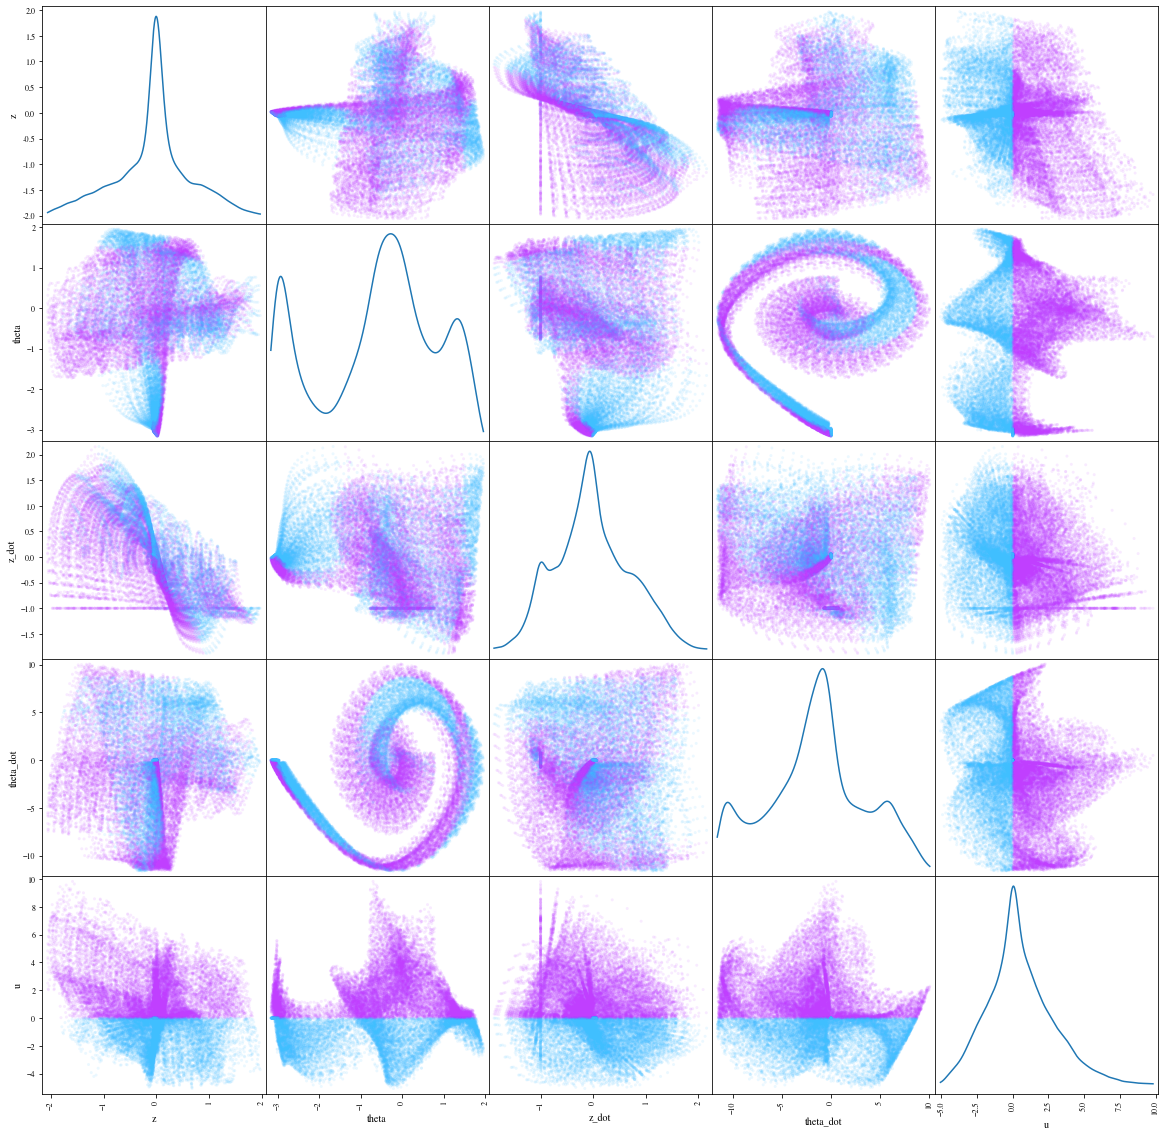

In [5]:
pd.plotting.scatter_matrix(df.drop(columns=["group"]), alpha=0.1, diagonal="kde", figsize=(20,20), c=df["u"] > 0, cmap="cool", vmin=-0.5, vmax=1.5);

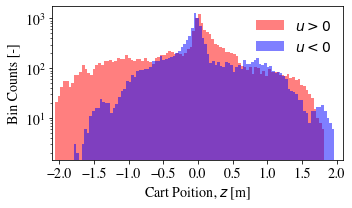

In [6]:
plt.figure(figsize=(5,3))
plt.hist(df["z"][df["u"] > 0], alpha=0.5, color="red", label=r"$u > 0$", bins=100)
plt.hist(df["z"][df["u"] < 0], alpha=0.5, color="blue", label=r"$u < 0$", bins=100)
plt.semilogy()
plt.legend(frameon=False, fontsize=14)
plt.xlabel(r"Cart Poition, $z$ [m]", fontsize=14)
plt.ylabel("Bin Counts [-]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-2.1, 2.1])
plt.tight_layout()
plt.savefig("../figures/eda/z_hist.png", dpi=500)

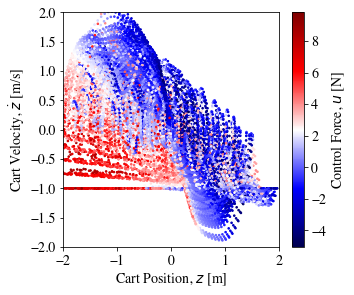

In [7]:
plt.figure(figsize=(5,4.2))
plt.scatter(df["z"], df["z_dot"], c=df["u"], alpha=1, marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Cart Position, $z$ [m]", fontsize=14)
plt.ylabel(r"Cart Velocity, $\dot{z}$ [m/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.tight_layout()
plt.savefig("../figures/eda/z_z_dot_scatter.png", dpi=500)

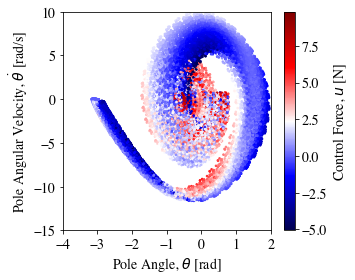

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(df["theta"], df["theta_dot"], alpha=1, c=df["u"], marker=".", s=10, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=14)
plt.xlabel(r"Pole Angle, $\theta$ [rad]", fontsize=14)
plt.ylabel(r"Pole Angular Velocity, $\dot{\theta}$ [rad/s]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-4, 2])
plt.ylim([-15, 10])
plt.tight_layout()
plt.savefig("../figures/eda/theta_theta_dot_scatter.png", dpi=500)